In [1]:
import output as oup 
import numpy as np
from matplotlib import pyplot as plt

In [30]:
cur = oup.cursor('../cyclus-files/oat/cooling-time/ct3.sqlite')
#cur = oup.cursor('ct0.sqlite')

In [4]:
hlw_waste = cur.execute('SELECT sum(quantity) FROM transactions '
                         'INNER JOIN `resources`'
                         'ON transactions.resourceid = resources.resourceid '
                         'WHERE Commodity = "lwrreprocessingwaste" '
                         'OR Commodity="frreprocessingwaste" OR Commodity="moxreprocessingwaste" ').fetchall()

In [5]:
hlw_waste[0][0]

6707891.29882242

In [6]:
depleted_u = cur.execute('SELECT sum(quantity) FROM transactions '
                         'INNER JOIN `resources`'
                         'ON transactions.resourceid = resources.resourceid '
                         'WHERE Commodity = "enrichmentwaste" ').fetchall()

In [7]:
depleted_u[0][0]

565863442.4813874

In [ ]:
inventory = oup.stockpiles(cur,'lwrstorage',False)
max(inventory['lwrstorage'])

In [ ]:
lwrstorage_id = oup.agent_ids(cur,'lwrstorage')

In [ ]:
pu_lwrstorage = cur.execute('SELECT timecreated, sum(quantity*massfrac) '
                            'FROM resources INNER JOIN `agentstateinventories` '
                            'ON agentstateinventories.resourceid = resources.resourceid '
                            'left join `compositions`'
                            'on resources.QualId = Compositions.QualId WHERE '
                            'agentid = "131" and nucid like "94%"'
                            'group by timecreated').fetchall()

In [5]:
init_year, init_month, duration, timestep = oup.simulation_timesteps(cur)

In [ ]:
b = oup.timeseries(pu_lwrstorage,duration,False)

In [ ]:
# The correct Pu in a facility 
stuffin = 'lwrout'
stuffout = 'lwrstorageout'
pu_in = cur.execute('SELECT time, sum(quantity*massfrac) ' 
'FROM transactions inner join resources '
'on Transactions.resourceid = resources.resourceid '
'left join compositions '
'on resources.QualId = Compositions.QualId '
'where commodity = "lwrout" and nucid like "94%" '
'group by time' ).fetchall()
pu_in_list = oup.timeseries(pu_in,duration,False)
pu_out = cur.execute('SELECT time, sum(quantity*massfrac) ' 
'FROM transactions inner join resources '
'on Transactions.resourceid = resources.resourceid '
'left join compositions '
'on resources.QualId = Compositions.QualId '
'where commodity = "lwrstorageout" and nucid like "94%" '
'group by time' ).fetchall()
pu_out_list = oup.timeseries(pu_out,duration,False)

In [ ]:
N = len(pu_out_list)
pu_inventory = np.zeros(N)
pu_inventory[0] = pu_in_list[0]
for x in range(N): 
    pu_inventory[x] = pu_inventory[x-1] + pu_in_list[x] - pu_out_list[x]

In [ ]:
pu_inventory

In [ ]:
spent_fuel = cur.execute('SELECT time, sum(quantity) FROM transactions '
                         'INNER JOIN resources '
                         'ON transactions.resourceid = resources.resourceid '
                         'WHERE Commodity = "lwrreprocessingwaste" '
                         'GROUP BY time ').fetchall()

In [ ]:
spent_fuel[1][0]

In [ ]:
SELECT timecreated, quantity, qualid 
FROM resources INNER JOIN agentstateinventories 
ON agentstateinventories.resourceid = resources.resourceid 
WHERE (agentid = "230")

In [26]:
ep = cur.execute('SELECT time, sum(value) '
                 'from timeseriespower '
                 'group by time').fetchall()

In [27]:
ep_list = oup.timeseries(ep,duration,False)

In [28]:
months = np.arange(0,duration) 

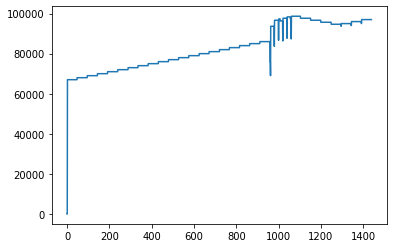

In [29]:
plt.plot(months,ep_list)

In [10]:
plt.plot(months,pu_inventory)

NameError: name 'pu_inventory' is not defined